## ccdefault dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
sns.set()

In [2]:
ccdefault = pd.read_csv("ccdefault.csv")
df = ccdefault.drop(['ID'], axis = 1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print("Number of Rows of Data = ", df.shape[0])
print("Number of Columns of Data = ", df.shape[1])

Number of Rows of Data =  30000
Number of Columns of Data =  24


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

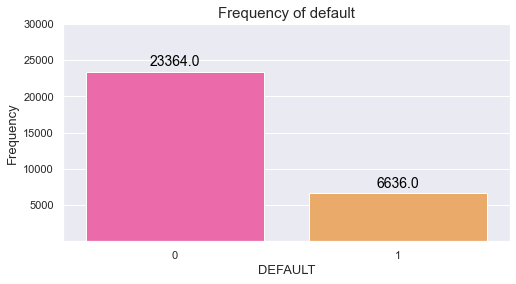

In [5]:
# bar plot of DEFAULT
value_counts = df['DEFAULT'].value_counts()
class_counts = pd.DataFrame({'Class': list(value_counts.index), 'value_count': value_counts})

plt.figure(figsize = (8,4))
g = sns.barplot(x = 'Class', y = 'value_count', data = class_counts, capsize = 0.3, palette = 'spring')
g.set_title("Frequency of default", fontsize = 15)
g.set_xlabel("DEFAULT", fontsize = 13)
g.set_ylabel("Frequency", fontsize = 13)
g.set_yticks([5000, 10000, 15000, 20000, 25000, 30000])
for p in g.patches:
    g.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha = 'center', va = 'center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

In [6]:
X = df.drop(['DEFAULT'], axis = 1)
y = df['DEFAULT']
X.shape, y.shape

((30000, 23), (30000,))

In [7]:
# with 90% for training and 10% for test
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y, test_size = 0.1, 
                                                    stratify = y, random_state = 123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27000, 23), (3000, 23), (27000,), (3000,))

In [8]:
single_tree = DecisionTreeClassifier(random_state = 123).fit(X_train, y_train)
print("The max depth for a single decision tree is", single_tree.max_features_)

The max depth for a single decision tree is 23


In [9]:
# Hyperparameters tuning for a single decision tree
dt = DecisionTreeClassifier(random_state = 123)
depth = np.arange(2, 24, 1)

# define grid search
grid = dict(max_depth = depth)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 123)
grid_search = GridSearchCV(estimator = dt, 
                           param_grid = grid, 
                           n_jobs = -1, 
                           cv = skf, 
                           scoring = 'accuracy', 
                           error_score = 0)
dt_cv = grid_search.fit(X_train, y_train)

In [10]:
print('The best parameters using cv is {}'.format(dt_cv.best_params_))

The best parameters using cv is {'max_depth': 4}


     Therefore, it is reasonable to use a small number(3, 4, 5) for the max depth of the tree, based on the result from the single decision tree classifier.

In [11]:
# Hyperparameters tuning for RF
rf = RandomForestClassifier(random_state = 123)
ne = [50, 100, 300, 500]
depth = [3, 4, 5]

# define grid search
grid = dict(n_estimators = ne, max_depth = depth)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 123)
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = grid, 
                           n_jobs = -1, 
                           cv = skf, 
                           scoring = 'accuracy', 
                           error_score = 0)
rf_cv = grid_search.fit(X_train, y_train)

In [12]:
for i in range(12):
    print('Parameters',rf_cv.cv_results_['params'][i])
    print('Mean fitting time is', np.round(rf_cv.cv_results_['mean_fit_time'][i], 4))
    print('In-sample accuracy is', np.round(rf_cv.cv_results_['mean_test_score'][i], 4))
    print('------------------------------------------')

Parameters {'max_depth': 3, 'n_estimators': 50}
Mean fitting time is 0.9161
In-sample accuracy is 0.8096
------------------------------------------
Parameters {'max_depth': 3, 'n_estimators': 100}
Mean fitting time is 2.0216
In-sample accuracy is 0.8096
------------------------------------------
Parameters {'max_depth': 3, 'n_estimators': 300}
Mean fitting time is 6.4933
In-sample accuracy is 0.8101
------------------------------------------
Parameters {'max_depth': 3, 'n_estimators': 500}
Mean fitting time is 10.66
In-sample accuracy is 0.8097
------------------------------------------
Parameters {'max_depth': 4, 'n_estimators': 50}
Mean fitting time is 1.3247
In-sample accuracy is 0.8131
------------------------------------------
Parameters {'max_depth': 4, 'n_estimators': 100}
Mean fitting time is 2.628
In-sample accuracy is 0.8127
------------------------------------------
Parameters {'max_depth': 4, 'n_estimators': 300}
Mean fitting time is 7.8816
In-sample accuracy is 0.8124
----

In [13]:
rf_index = np.argmax(rf_cv.cv_results_['mean_test_score'])
rf_mean_train = np.round(rf_cv.best_score_, 3)
rf_std_train = np.round(rf_cv.cv_results_['std_test_score'][rf_index], 3)
rf_score = str(rf_mean_train) + ' +/- ' + str(rf_std_train)
print('The accuracy score of 10-fold cross validation is ' + rf_score)

The accuracy score of 10-fold cross validation is 0.814 +/- 0.005


In [14]:
print('The best parameters using cv is {}'.format(rf_cv.best_params_))

The best parameters using cv is {'max_depth': 5, 'n_estimators': 50}


In [15]:
rf = rf_cv.best_estimator_
rf_test = np.round(rf.score(X_test, y_test), 3)
print('The test accuracy score is',rf_test)

The test accuracy score is 0.812


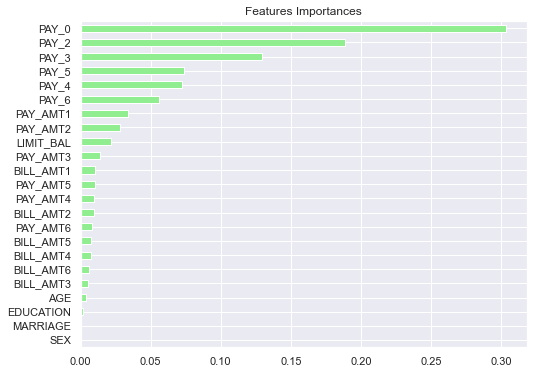

In [16]:
plt.figure(figsize = (8,6))

# Create a pd.Series of features importances
importances = pd.Series(data = rf.feature_importances_,
                        index = X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind = 'barh', color = 'lightgreen')
plt.title('Features Importances')
plt.show()

## Conclusions

(a) What is the relationship between n_estimators, in-sample CV accuracy and computation time?

- As the n_estimators grows, the computation time grows a lot. But the in-sample CV accuracy does not have obvious change, since a small number of trees is enough to give an accurate prediciton.

(b) What is the optimal number of estimators for your forest? 

- The optimal number of estimators is 50

(c)	Which features contribute the most importance in your model according to scikit-learn function? 

- PAY_0

(d)	What is feature importance and how is it calculated? 

- The impurity-based feature importances is the (normalized) total reduction of the criterion brought by that feature.

In [17]:
print("My name is {Jinglun Gao}")
print("My NetID is: {jinglun3}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Jinglun Gao}
My NetID is: {jinglun3}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
